Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from systole.detection import oxi_peaks, signal_quality, artefact_correction
from systole.hrv import time_domain, frequency_domain, nonlinear

In [2]:
path = 'C:/Users/au646069/Downloads/Phila_heartratedata/'

In [3]:
subjects = os.listdir(path)[1:]

In [4]:
final = pd.DataFrame([])
for subject in subjects:
    files = os.listdir(path + subject)[1:]
    for f in files:
        if f[-3:] != 'png':

            # Import data
            oxi=np.load(path + subject + '/' + f, allow_pickle=True)[0]

            # Quality check
            clean_oxi, good_signal = signal_quality(oxi)
            
            if len(clean_oxi)/len(oxi)>0.7:
                oxi = clean_oxi.copy()

            # Extract peak vectors
            signal, peaks = oxi_peaks(oxi)

            # Artefact corection
            clean_peaks, per = artefact_correction(peaks)

            rr = np.diff(np.where(clean_peaks)[0])
            td = time_domain(rr)
            fd = frequency_domain(rr)
            nl = nonlinear(rr)

            stats = pd.concat([td, fd, nl], sort=False)
            stats['Subject'] = subject
            stats['File'] = f
            final = final.append(stats, sort=False)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1969: UserWarning: nperseg = 1280 is greater than input length  = 886, using nperseg = 886
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1969: UserWarning: nperseg = 1280 is greater than input length  = 895, using nperseg = 895
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1969: UserWarning: nperseg = 1280 is greater than input length  = 1104, using nperseg = 1104
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1969: UserWarning: nperseg = 1280 is greater than input length  = 673, using nperseg = 673
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1969: UserWarning: nperseg = 1280 is greater than input length  = 849, using nperseg = 849
  .format(nperseg, input_length))
C:\ProgramData\Anaconda3\lib\site

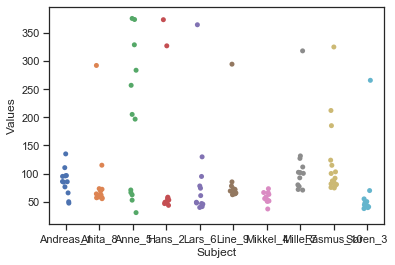

In [6]:
sns.stripplot(data=final[final.Metric=='RMSSD'], x='Subject', y='Values')

In [8]:
final.to_csv('Phila_HRV.txt')